In [2]:
# Import dependencies
import pandas as pd #For importing data and data munging
import numpy as np
import seaborn as sns # for data visualization
from sklearn.linear_model import LinearRegression as LinReg #For predective modeling
import datetime as dt #To work with datetime
import pandas_datareader as pdr #To read and import data from web
import matplotlib.pyplot as plt # For data visualization
from matplotlib import style # To choose from styles from matplotlib
style.use('ggplot')
%matplotlib inline 

In [3]:
# Set start and end dates
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2015, 1, 1)

In [4]:
# Import data from web using pandas datareader and save it in a variable
apple = pdr.get_data_yahoo('AAPL', start=start, end=end)
microsoft = pdr.get_data_yahoo('MSFT', start=start, end=end)
amazon = pdr.get_data_yahoo('AMZN', start=start, end=end)
sony = pdr.get_data_yahoo('SNE', start=start, end=end)
google = pdr.get_data_yahoo('GOOG', start=start, end=end)
#tesla = pdr.get_data_yahoo('TSLA', start=start, end=end)

In [5]:
# Below I create a DataFrame consisting of the adjusted closing price of imported stocks.
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "AMZN": amazon["Adj Close"],
                      "SNE": sony["Adj Close"],
                      "GOOG": google["Adj Close"]},
                       index=None)
                       #"TSLA": tesla["Adj Close"]},

In [6]:

stocks.head()#To see the first five rows in stocks dataframe
apple.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.727039
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.774976
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.333178
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.282650
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.464034


In [7]:
stocks.tail() #To see the last 5 rows in stocks column

,AAPL,AMZN,GOOG,MSFT,SNE
Date,,,,,
2014-12-24,107.271380,303.029999,528.772422,45.337706,21.320000
2014-12-26,109.167611,309.089996,534.032392,45.092843,21.270000
2014-12-29,109.091001,312.040009,530.332426,44.687873,21.170000
2014-12-30,107.759799,310.299988,530.422394,44.282904,20.580000
2014-12-31,105.710333,310.350006,526.402397,43.746085,20.469999


In [8]:
stocks.shape

(1258, 5)

In [9]:
stocks.index #To see the index of stocks df

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [10]:
stocks.columns #To see the column names in stocks df

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'SNE'], dtype='object')

In [11]:
stocks.values #To see the values of columns in stocks df

array([[  27.727039,  133.899994,  313.062468,   25.555485,   30.02    ],
       [  27.774976,  134.690002,  311.683844,   25.563741,   29.879999],
       [  27.333178,  132.25    ,  303.826685,   25.406859,   29.85    ],
       ..., 
       [ 109.091001,  312.040009,  530.332426,   44.687873,   21.17    ],
       [ 107.759799,  310.299988,  530.422394,   44.282904,   20.58    ],
       [ 105.710333,  310.350006,  526.402397,   43.746085,   20.469999]])

In [12]:
#Group the date index of stocks and store in to stocks_new as dataframe
times = pd.DatetimeIndex(stocks.index)
stocks_date = stocks.groupby([times.date]).mean()
stocks_year = stocks.groupby([times.year]).mean()
stocks_month = stocks.groupby([times.month]).mean()
stocks_day = stocks.groupby([times.day]).mean()
stocks_hour = stocks.groupby([times.hour]).mean()
#stocks_new.head()
#stocks_year.shape
#stocks_year.head()
#stocks_year.fillna(0)
#stocks.fillna(0)

In [ ]:
times = pd.DatetimeIndex(stocks.index)
stocks_year = stocks.groupby([times.year]).mean()

In [13]:
stocks_new = stocks_year.loc[:, ["AAPL", "MSFT"]] #Selected AAPL and MSFT columns using .loc 
stocks_new.head()                            #and stored them in new variable
#stocks_new.shape

,AAPL,MSFT
2010,33.665072,22.555294
2011,47.160237,22.237127
2012,74.813837,26.149729
2013,62.617988,29.379392
2014,87.635833,39.499515


In [14]:
 #To see the first 5 rows in apple df
times_appl = pd.DatetimeIndex(apple.index)
apple_grp = apple.groupby([times_appl.year]).mean()
times_sony = pd.DatetimeIndex(sony.index)
sony_grp = sony.groupby([times_sony.year]).mean()
sony_adj = sony_grp.loc[:,["Adj Close"]]
#times_appl = pd.DatetimeIndex(apple_adj.index)
#apple_adj = apple_adj.groupby([times_appl.year]).mean()
apple_adj=apple_grp.loc[:,["Adj Close"]]
apple.head()
#apple_adj.head()
#apple_grp.head()



,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.727039
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.774976
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.333178
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.282650
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.464034


In [15]:
#apple.tail() #see last 5 rows in apple df

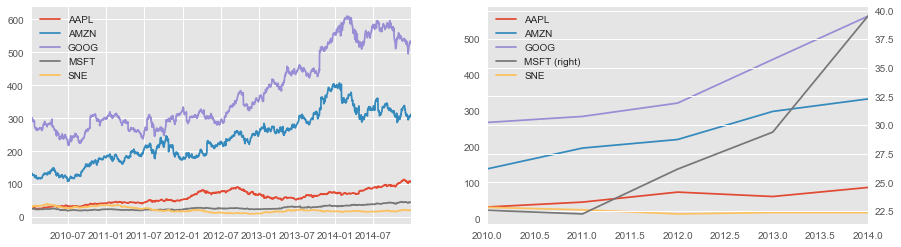

In [16]:
fig, axs = plt.subplots(1,2)
stocks_date.plot(figsize=(15,4), ax=axs[0]) #plot the stocks df
#stocks_year.plot( figsize=(15,4), ax=axs[1])
stocks_year.plot(secondary_y = ["MSFT"], figsize=(15,4), ax=axs[1])


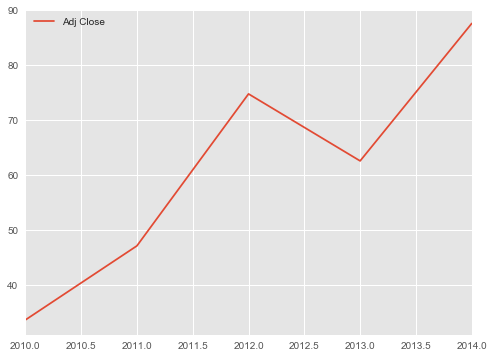

In [17]:
apple_adj.plot( grid=True, figsize=(8,6))
#sony.head()

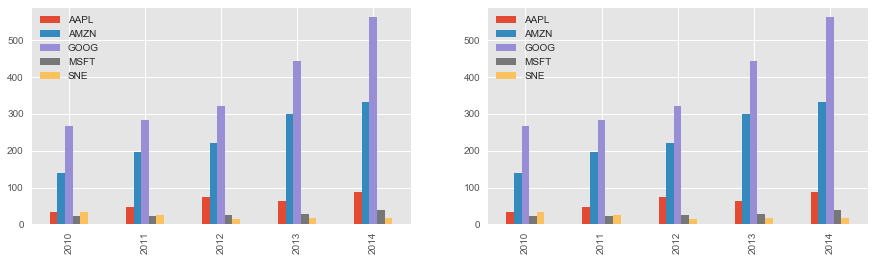

In [18]:
#sns.barplot(x=stcks_grpd.index, y='AAPL', data=stcks_grpd)
fig, axs = plt.subplots(1,2)
stocks_year.plot.bar(x=stocks_year.index, ax=axs[0], figsize=(15,4))
stocks_year.plot.bar(x=stocks_year.index, ax=axs[1], figsize=(15,4))

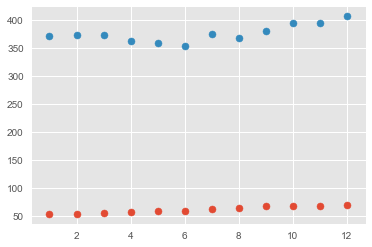

In [19]:
plt.scatter(stocks_month.index, stocks_month['AAPL'])
plt.scatter(stocks_month.index, stocks_month['GOOG'])
#plt.scatter(stocks.index, stocks['MSFT'])
#plt.scatter(stocks_new.index, stocks_new['SNE'])

In [20]:
stocks_date.describe()
stocks_year.describe()
#stocks_day.describe()
#microsoft.describe()
#apple.describe()
#stocks_new.describe()

,AAPL,AMZN,GOOG,MSFT,SNE
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,61.178593,237.339736,375.171674,27.964211,21.868406
std,21.456266,77.999829,124.365267,7.078386,7.306189
min,33.665072,139.140397,267.544462,22.237127,14.495560
25%,47.160237,196.672024,284.203368,22.555294,18.074762
50%,62.617988,220.303640,321.087703,26.149729,18.299603
75%,74.813837,298.031588,441.680447,29.379392,25.810397
max,87.635833,332.551033,561.342392,39.499515,32.661706


In [21]:
stocks_date.mean()
#stocks_year.mean()
#stocks_month.mean()
#apple_adj.mean()
#google_close.mean()
apple_adj.mean()
sony_adj.mean()

Adj Close    21.868406
dtype: float64

In [22]:
stocks_date.median()
stocks_year.median()
stocks_month.median()
#apple_adj.median()

AAPL     60.130542
AMZN    235.076184
GOOG    372.424065
MSFT     27.792899
SNE      21.039104
dtype: float64

In [23]:
stocks_date.std()
stocks_year.std()
stocks_month.std()
#apple_adj.std()

AAPL     5.912250
AMZN    15.844708
GOOG    15.732202
MSFT     1.111332
SNE      1.814491
dtype: float64

In [24]:
stocks_year.apply(np.cumsum)
# Or apply your own function, such as ﬁnding the spread (max value - min value):
stocks_year.apply(lambda x: x.max() - x.min())

#apple_adj.apply(np.cumsum)
#apple_adj.apply(lambda x: x.max() - x.min())

AAPL     53.970761
AMZN    193.410636
GOOG    293.797930
MSFT     17.262389
SNE      18.166146
dtype: float64

In [25]:
LinReg(stocks_year.head())
#LinReg(apple_adj.head())

LinearRegression(copy_X=True,
         fit_intercept=           AAPL        AMZN        GOOG       MSFT        SNE
2010  33.665072  139.140397  267.544462  22.555294  32.661706
2011  47.160237  196.672024  284.203368  22.237127  25.810397
2012  74.813837  220.303640  321.087703  26.149729  14.495560
2013  62.617988  298.031588  441.680447  29.379392  18.299603
2014  87.635833  332.551033  561.342392  39.499515  18.074762,
         n_jobs=1, normalize=False)

In [26]:
np.corrcoef(stocks_year)[1, 3]

0.99947955411827549

In [27]:
#sns.stripplot(x="MSFT", y="AAPL", data=stocks_3, hue_order = ["AAPL", "MSFT"])

In [28]:
#times = pd.DatetimeIndex(stocks.index)
#grouped_raw = stocks.groupby([times.year])
#grouped = stocks.groupby([times.year]).mean()

In [29]:
#grouped_raw.head()
#grouped.head()

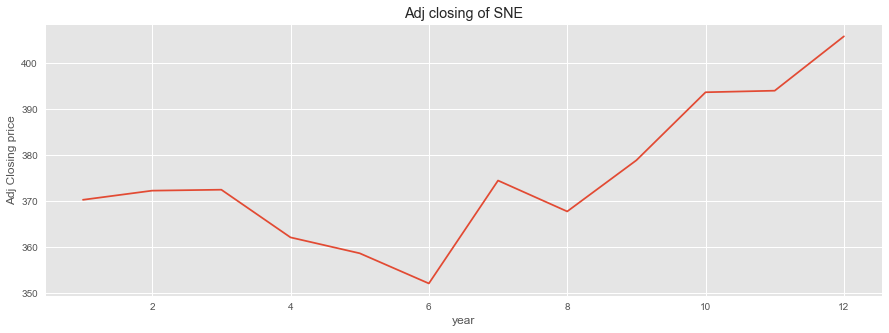

In [30]:
plt.figure(figsize= (15,5))
plt.plot(stocks_month['GOOG'])
plt.title("Adj closing of SNE")
plt.xlabel("year")
plt.ylabel("Adj Closing price")
plt.show()

In [31]:
x = stocks_year.index.values.reshape(-1, 1)
y = stocks_year['MSFT'].values

In [32]:
reg = LinReg()
reg.fit(x,y)
y_pred = reg.predict(x)
ci=reg.score(x,y) #to calculate the confidence interval, which corresponds with the standard error of the estimate
print("Accuracy: " + str(ci))

Accuracy: 0.840019810132


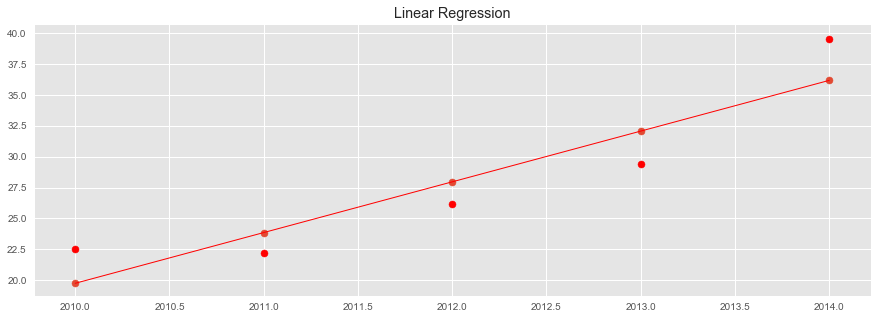

In [33]:
plt.figure(figsize = (15, 5))
plt.title('Linear Regression')
plt.scatter(x=x, y=y_pred)
plt.scatter(x=x, y=y, c="r")
plt.plot(x, reg.predict(x), color='r',
         linewidth=1)
plt.gca()

In [34]:
reg.predict(2020)

array([ 60.78877805])

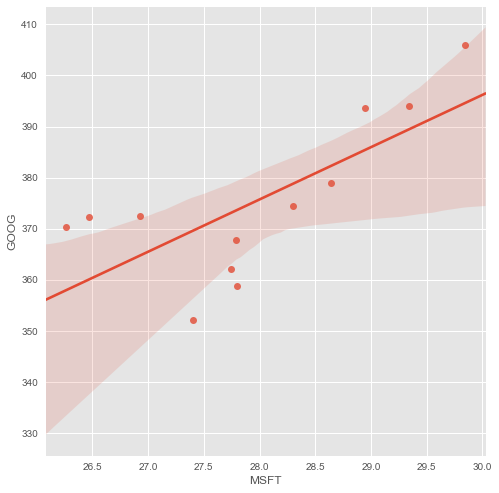

In [35]:
sns.pairplot(stocks_month, x_vars='MSFT', y_vars='GOOG', size=7, kind='reg')

In [36]:
#sns.regplot(x=x, y=y, color="r", ci=ci, scatter=True)

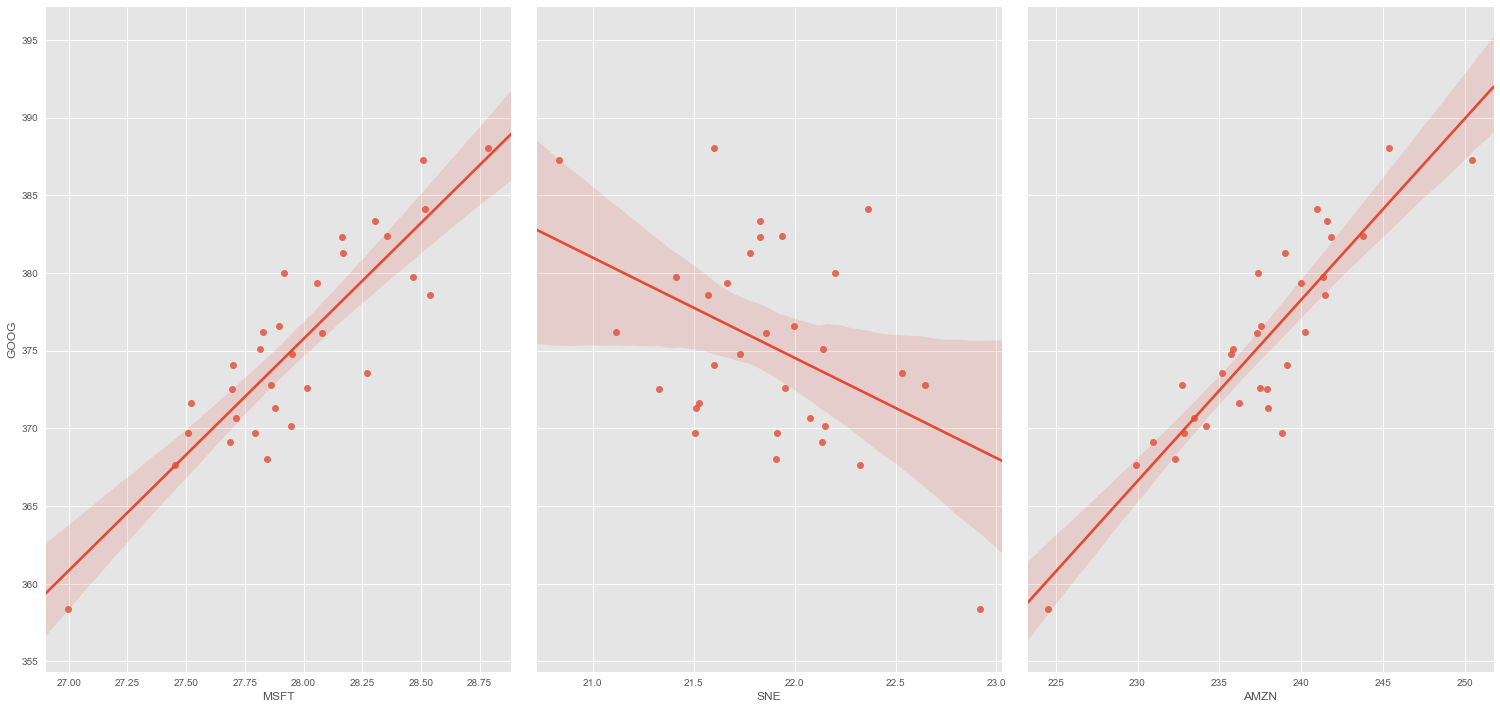

In [44]:
sns.pairplot(stocks_day,  x_vars=["MSFT","SNE","AMZN"] , y_vars='GOOG', aspect=0.7, size=10, kind='reg')